# Problem Set # 2

### MACS  30100,   Dr. Evans
### Zunda Xu

#### Import Packages and Data

In [1]:
%matplotlib notebook
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd

#import data of two problems
income = np.loadtxt('incomes.txt')
sick = pd.read_csv("sick.txt")

### Problem 1: Some income data, lognormal distribution, and hypothesis testing

#### Define the functions used in Problem 1

In [2]:
# Define function that generates values of a lognormal
# probability density function (PDF)
def lognorm_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the lognormal pdf with mean mu and
    standard deviation sigma. Note that in this function, the values
    of x must be nonnegative and also the sigma must be strictly postive
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the lognormally distributed random
             variable
    mu     = scalar, mean of the lognormally distributed random variable
    sigma  = scalar > 0, standard deviation of the lognormally distributed
             random variable
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals = (N,) vector, lognormal PDF values for mu and sigma
               corresponding to xvals data
    
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''          
    pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi)) * 
                np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals

# Define log likelihood function for the lognormal distribution
def log_lik_lognorm(xvals, mu, sigma):
    pdf_vals = lognorm_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

# Define the criterion function
def crit(params):
    mu, sigma = params
    log_lik_val = log_lik_lognorm(income, mu, sigma)
    neg_log_lik_val = -np.sum(log_lik_val)
    
    return neg_log_lik_val


#### Part ( a ) : Plot a histogram of percentages of the income.txt data with 30 bins.

<IPython.core.display.Javascript object>


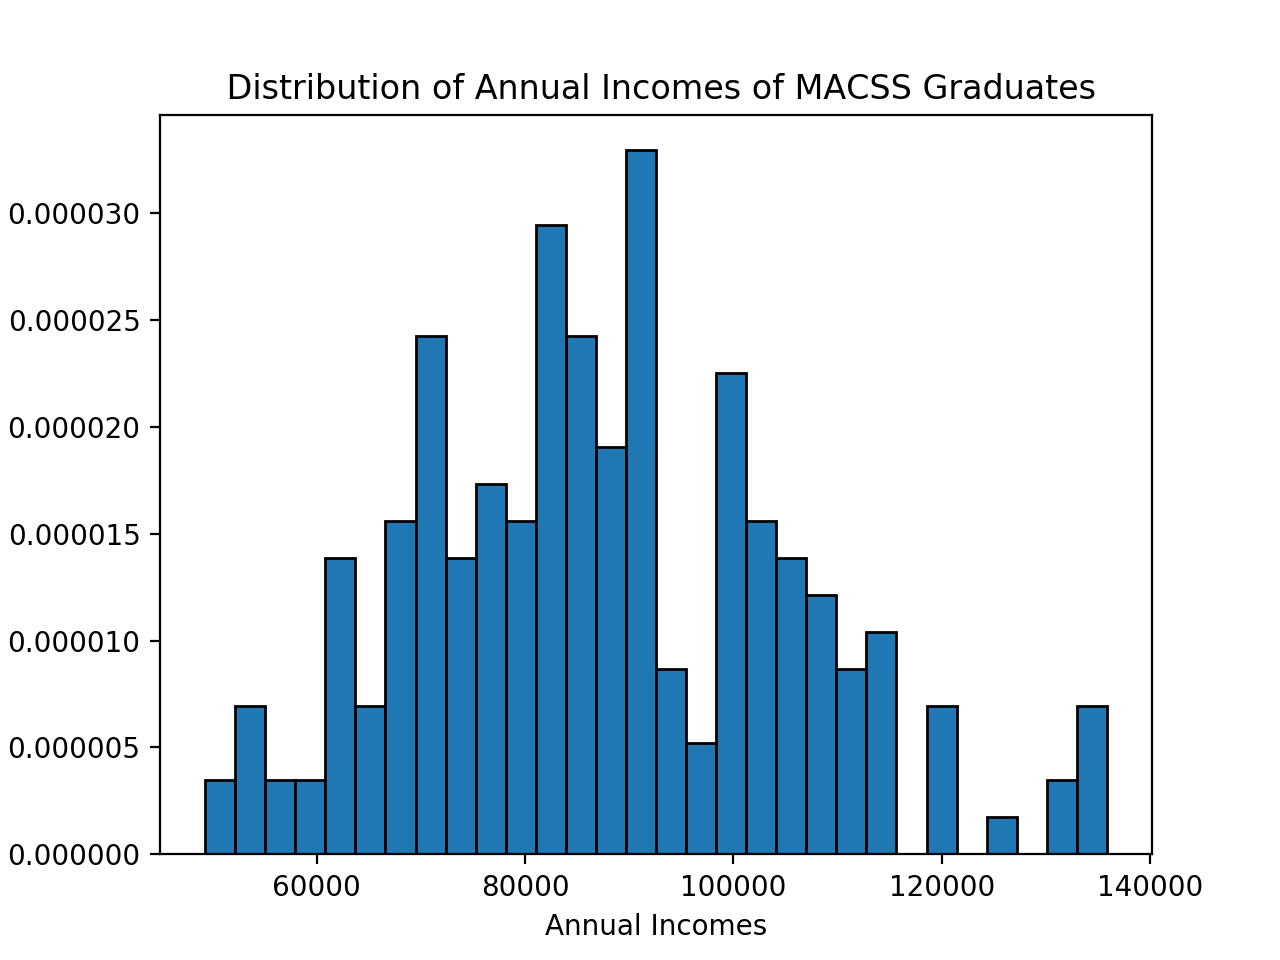

[Text(0,0.5,'Density'),
 Text(0.5,0,'Annual Incomes'),
 Text(0.5,1,' Distribution of Annual Incomes of MACSS Graduates')]

In [4]:
fig, ax = plt.subplots()
ax.hist(income, bins = 30, normed = True, edgecolor = "Black")
ax.set(title =' Distribution of Annual Incomes of MACSS Graduates', 
       xlabel = 'Annual Incomes',
       ylabel = 'Density')

####  Part ( b ) : Plot the lognormal PDF and calculate the log likelihood value

The figure of the lognormal PDF is as follows:

/Users/winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/Users/winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/Users/winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


<IPython.core.display.Javascript object>


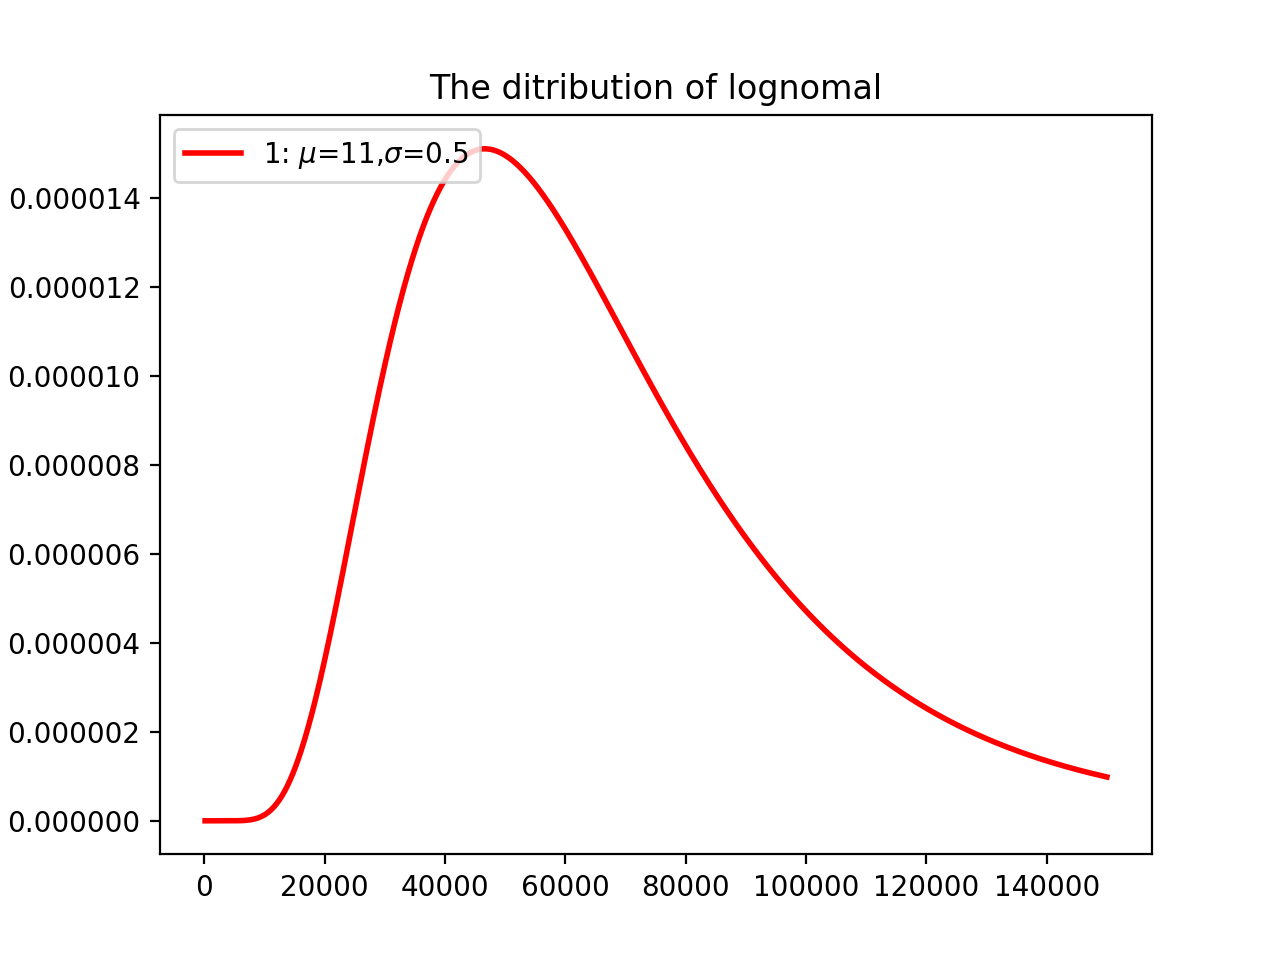

Text(0.5,1,'The ditribution of lognomal')

In [6]:
dist_income = np.linspace(0, 150000, 1000)
mu_1 = 11
sig_1= 0.5
plt.plot(dist_income, lognorm_pdf(dist_income, mu_1, sig_1),
         linewidth=2, color='r', label='1: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')
plt.title("The ditribution of lognomal")


In [7]:
print('The value of log likelihood for this parameterization is: ', log_lik_lognorm(income, mu_1, sig_1))

The value of log likelihood for this parameterization is:  -2385.85699781


#### Part ( c ) : Estimate the parameters of the lognormal distribution by maximum likelihood

First, we estimate the parameters of the lognormal distribution:

In [8]:
mu_init = 11.0 # mu_1
sig_init = 0.5  # sig_1
params_init = [mu_init, sig_init]
results = opt.minimize(crit, params_init, method='L-BFGS-B', bounds=((None,None),(0.1, None)))
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 11.3590243967  sig_MLE= 0.208178530156


Then, we plot the PDF of the lognormal distribution with the estimated parameters against the PDF from part (b) and the histogram from part (a).

<IPython.core.display.Javascript object>


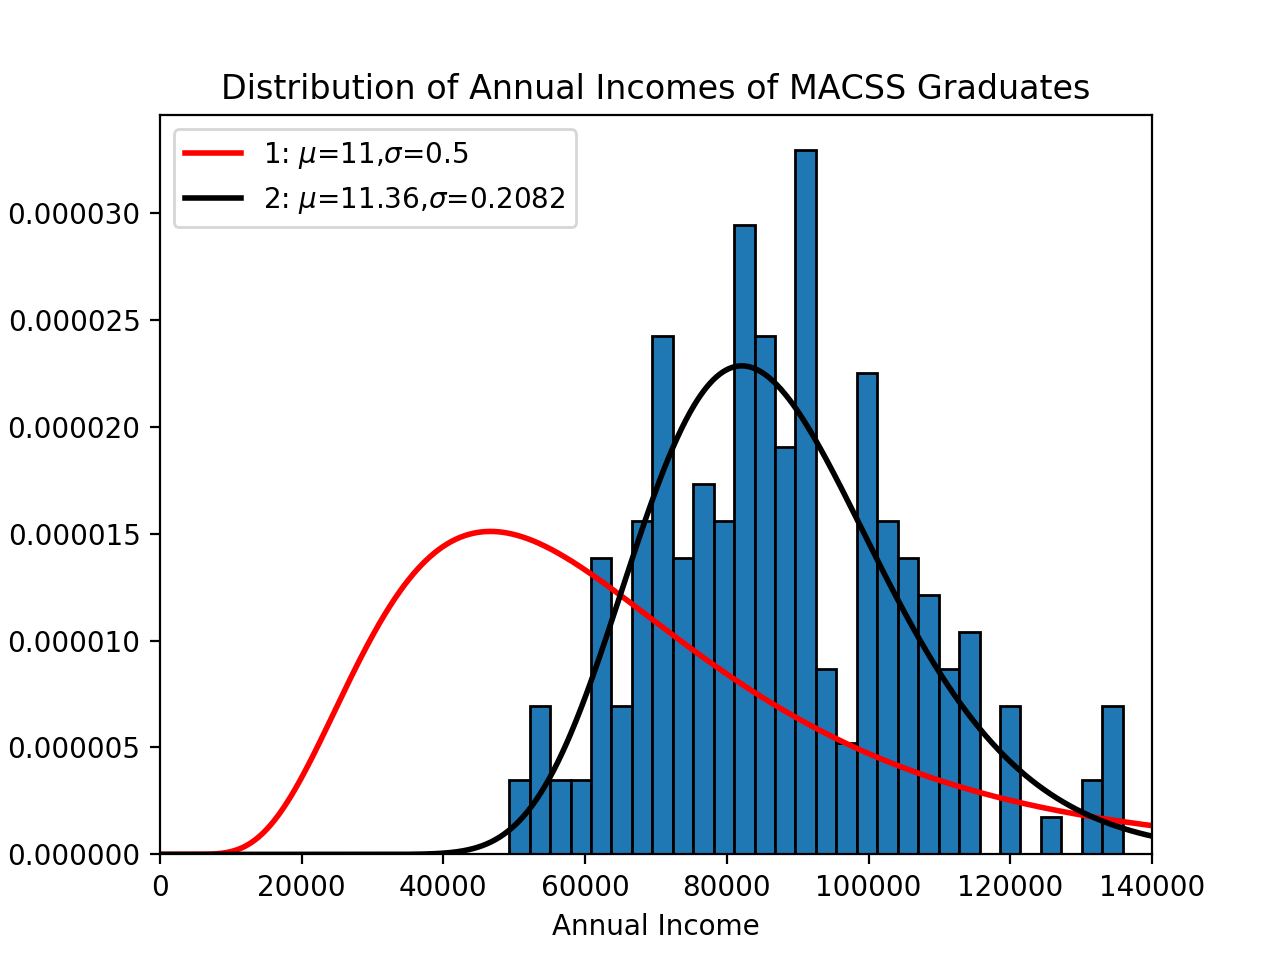

/Users/winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
/Users/winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log
/Users/winston/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


In [9]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(income, 30, edgecolor='black', normed=True)
plt.title('Distribution of Annual Incomes of MACSS Graduates')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.xlim([0,140000]) # Plot the histogram of the data

# Plot the two test distributions from before
plt.plot(dist_income, lognorm_pdf(dist_income, mu_1, sig_1),
         linewidth=2, color='r', label='1: $\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

# Plot the MLE estimated distribution
plt.plot(dist_income, lognorm_pdf(dist_income, mu_MLE, sig_MLE),
         linewidth=2, color='k', label='2: $\mu$=11.36,$\sigma$=0.2082')
plt.legend(loc='upper left')

Next, we will calculate the value of the likelihood function and the variance-covariance metrix.

In [20]:
# calculate the value of the liklihood function
print('The value of the Log-likelihood function : ', log_lik_lognorm(income, mu_MLE, sig_MLE))

The value of the Log-likelihood function :  -2241.71930137


In [21]:
# calculate variance-covariance metrix
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[  2.52831353e-04  -2.76208826e-05]
 [ -2.76208826e-05   1.30457089e-04]]
Standard error for mu estimate =  0.0159006714777
Standard error for sigma estimate =  0.0114217813365


#### Part ( d ) : Perform a likelihood ratio test

In [12]:
log_lik_h0 = log_lik_lognorm(income, 11, 0.5)
log_lik_mle = log_lik_lognorm(income, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


Since the p-value is equal to 0, therefore, it's unlikely that the data in incomes.txt came from the distribution in Part (b).

#### Part ( e ) : Proability of earning more than 100,000 and less than 75,000

In [13]:
prob_a = 1 - sts.lognorm.cdf(100000, s=sig_MLE, loc=mu_MLE, scale=np.exp(mu_MLE)).round(3)
print('The probability of earning more than $100,000 is', prob_a)

prob_b = sts.lognorm.cdf(75000, s=sig_MLE, loc=mu_MLE, scale=np.exp(mu_MLE)).round(3)
print('The probability of earning less than $75,000 is', prob_b)

The probability of earning more than $100,000 is 0.23
The probability of earning less than $75,000 is 0.26


### Problem 2 : Linear Regression and MLE

#### Part ( a ) : Estimate the parameters of the model by maximum likelihood 

In [14]:
# Data processing
xvals = sick.iloc[:, 1:].values # values of vector X in the linear regression model
yvals = sick.loc[:, "sick"].values # values of dependent variable in the model
xvals = np.concatenate((np.ones((len(yvals), 1)),xvals), axis = 1) # Add 1 to the front of each data, 
                                                                          #which is correspond with parameter Beta_0
num_param = xvals.shape[1] # the number of total parameters in the model

def crit2(params):
    beta = params[0:num_param]
    sigma2 = params[num_param]   
    log_lik_val = len(yvals)/2*np.log(2*np.pi*sigma2) + 1/2/sigma2*(yvals - xvals @ beta).T @ (yvals - xvals @ beta)
    
    return log_lik_val

Then we do the estimation:

In [15]:
results2 = opt.minimize(crit2, [1,0,0,0,0.01], method='L-BFGS-B', bounds = ((None, None), (None, None),
                                                                            (None, None),(None, None),
                                                                            (1e-10, None)))

print("The estimates for beta_0 to sigma^2 are as follows:")
print(results2.x)

The estimates for beta_0 to sigma^2 are as follows:
[  2.51644553e-01   1.29335605e-02   4.00500112e-01  -9.99175290e-03
   9.10293751e-06]


Then we calculate the value of the log likelihood function and the estimated variance-covariance matrix

In [16]:
# The value of the log likelihood function
print("Log Likelihood:")
print(-results2.fun)

# The variance covariance matrix
Hinv = results2.hess_inv.todense()
OffDiagNeg = -np.ones(Hinv.shape) + np.eye(Hinv.shape[0])* 2
VCV = Hinv * OffDiagNeg
print("VCV matrix:")
print(VCV)

Log Likelihood:
876.865062672
VCV matrix:
[[  2.75704726e+03  -1.31994318e+01   3.27180282e+02   5.84202636e+01
   -2.83873640e+00]
 [ -1.31994318e+01   6.81502571e-02   1.60144483e+00   2.82966741e-01
   -1.35541029e-02]
 [  3.27180282e+02   1.60144483e+00   3.90753544e+01  -6.95595770e+00
    3.36606203e-01]
 [  5.84202636e+01   2.82966741e-01  -6.95595770e+00   1.24006007e+00
    6.01269973e-02]
 [ -2.83873640e+00  -1.35541029e-02   3.36606203e-01   6.01269973e-02
    2.92326654e-03]]


#### Part ( b ) Likelihood Ratio Test

In [17]:
loglik_h0 = -crit2([1,0,0,0,0.01])
loglik_mle = -crit2(results2.x)
LR_val_2 = 2 * (loglik_mle - loglik_h0)
pval_h0_2 = 1.0 - sts.chi2.cdf(LR_val_2, 5)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0_2)

chi squared of H0 with 5 degrees of freedom p-value =  0.0


Since the p-value is equal to 0, therefore, it's unlikely that age, number of children and average winter temperature have no effect on the number of sick days